In [ ]:
# ! cd "/content/drive/MyDrive/programs"; git clone https://github.com/ultralytics/yolov5  # clone repo
# ! pip install -U -r yolov5/requirements.txt  # install dependencies
# ! pip install -U PyYAML
# ! pip install wandb

     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Download Datasets**

In [ ]:
# ! cd "/content/drive/MyDrive/dataset"; wget "https://github.com/alitourani/Iranis-dataset/raw/master/Iranis%20Dataset%20Files.zip"
# ! cd "/content/drive/MyDrive/dataset/Plates"; wget "https://archive.org/download/HDRDataset/2017-IWT4S-HDR_LP-dataset.zip"; unzip "2017-IWT4S-HDR_LP-dataset.zip"

In [ ]:
import torch
import os
import cv2
from IPython.display import display, Image  # for displaying images
from IPython.core.magic import register_line_cell_magic
import yaml # define number of classes based on YAML
import wandb
from utils.utils import plot_results

print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.9.0+cu111 CPU


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
def load_images_from_folder(folder, fdis):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
          img= cv2.resize(img, (128,128))
          img= cv2.GaussianBlur(img, (5,5), 0.3)
          filename= filename.replace('png','jpeg')
          cv2.imwrite(fdis+filename, img)

load_images_from_folder("/content/drive/MyDrive/dataset/Plates/crop_m4/", "/content/drive/MyDrive/dataset/Plates/val/")

In [ ]:
def LableGenerationFiles(ID, x,y,w,h):
  folder='/content/drive/MyDrive/dataset/Plates/val/'
  for filename in os.listdir(folder):
    filename= filename.replace('jpeg','txt')
    f = open(folder+filename, "w")
    lables= ID+' '+x+' '+y+' '+w+' '+h
    f.write(lables+"\n")
    f.close()

LableGenerationFiles('0','0.503906', '0.503906', '0.992188', '0.992188')

In [ ]:
# data.yaml contains the information about number of classes and their labels required for this project
with open("/content/drive/MyDrive/programs/yolov5/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)

1


In [ ]:
#customize iPython writefile so we can write variables
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
# The FullLoader parameter handles the conversion from YAML
# scalar values to Python the dictionary format
with open(r'/content/drive/MyDrive/programs/yolov5/data.yaml') as file:
    labels_list = yaml.load(file, Loader=yaml.FullLoader)
    label_names = labels_list['names']

In [ ]:
print("Number of Classes are {}, whose labels are {} for this Object Detection project".format(num_classes,label_names))

Number of Classes are 1, whose labels are ['plate'] for this Object Detection project


In [ ]:
! cd '/content/drive/MyDrive/programs/yolov5/'; python train.py --img 128 --batch 32 --epochs 50 --data '/content/drive/MyDrive/programs/yolov5/data.yaml' --cfg '/content/drive/MyDrive/programs/yolov5/models/yolov5s.yaml' --weights ''

wandb: Currently logged in as: reza00021 (use `wandb login --relogin` to force relogin)
train: weights=, cfg=/content/drive/MyDrive/programs/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/programs/yolov5/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=32, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-13-gfc36064 torch 1.9.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_

In [ ]:
# ! cd "/content/drive/MyDrive/dataset/Plates/crop_m3 (1)"; mmv \* h\#1; ls
# ! cd "/content/drive/MyDrive/dataset/Plates/crop_m3 (1)"; mv * ../train; ls
# ! cd "/content/drive/MyDrive/dataset/Plates"; mkdir val; #mv 'train' 'train2'; mkdir train;
# ! rm '/content/drive/MyDrive/dataset/Plates/train.cache'
# ! cd '/content/drive/MyDrive/dataset/Plates/labels'; 
# ! ls /content/drive/MyDrive/dataset/Plates/list_train.txt

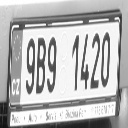

In [ ]:
display(Image(filename="/content/drive/MyDrive/dataset/Plates/train/cI00065.jpeg"))
# /content/drive/MyDrive/programs/yolov5/runs/train/exp9/weights/last.pt

In [ ]:
! cd '/content/drive/MyDrive/programs/yolov5/'; python detect.py --weights runs/train/exp11/weights/last.pt --conf 0.4 --source '/content/drive/MyDrive/dataset/test/'

detect: weights=['runs/train/exp11/weights/last.pt'], source=/content/drive/MyDrive/dataset/test/, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-13-gfc36064 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients
image 1/10 /content/drive/MyDrive/dataset/test/aI00000.jpeg: 640x640 53 plates, Done. (0.447s)
image 2/10 /content/drive/MyDrive/dataset/test/car1.jpg: 448x640 44 plates, Done. (0.311s)
image 3/10 /content/drive/MyDrive/dataset/test/car22.jpg: 448x640 45 plates, Done. (0.305s)
image 4/10 /content/drive/MyDrive/dataset/test/car23.png: 320x640 32 plates, Done. (0.227s)
image 5/10 /content/drive/MyDrive/dataset/test/ca

In [ ]:
! cd "/content/drive/MyDrive/dataset/Plates/weights";  wget "https://github.com/sid0312/anpr_yolov5/raw/master/weights/last.pt"
# ! cd "/content/drive/MyDrive/dataset/Plates/weights/yolo-license-plate-detection-master/weights/last.pt"; ls -l

--2021-10-15 10:15:32--  https://github.com/sid0312/anpr_yolov5/raw/master/weights/last.pt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sid0312/anpr_yolov5/master/weights/last.pt [following]
--2021-10-15 10:15:32--  https://raw.githubusercontent.com/sid0312/anpr_yolov5/master/weights/last.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27728874 (26M) [application/octet-stream]
Saving to: ‘last.pt’

last.pt             100%[===================>]  26.44M  53.8MB/s    in 0.5s    

2021-10-15 10:15:33 (53.8 MB/s) - ‘last.pt’ saved [27728874/27728874]

